In [1]:
# https://blog.naver.com/ostin1038/222152574573

In [2]:
x = """
T 검정과 달리 측정하고 싶은 내용에 그룹이 여러개가 있다면 --> anova

"""

In [5]:
import pandas as pd
import random 

random.seed(1636)

Group_1= []
[Group_1.append( round(random.uniform(5.2, 7.3), 1)) for i in range( 50)] 
Group_1 = pd.DataFrame({'group':'Group_1', 'freq': Group_1})
Group_2= []
[Group_2.append( round(random.uniform(4.6, 7.2), 1)) for i in range( 50)]
Group_2 = pd.DataFrame({'group':'Group_2', 'freq': Group_2})
Group_3= []
[Group_3.append( round(random.uniform(4.2, 6.8), 1)) for i in range( 50)]
Group_3 = pd.DataFrame({'group':'Group_3', 'freq': Group_3})

df = pd.concat([Group_1, Group_2, Group_3])
df

,group,freq
0,Group_1,7.1
1,Group_1,6.2
2,Group_1,7.1
3,Group_1,6.9
4,Group_1,5.5
...,...,...
45,Group_3,5.2
46,Group_3,5.1
47,Group_3,6.2
48,Group_3,6.0


In [7]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('freq ~ C(group)', df).fit()
anova_lm(model)


,df,sum_sq,mean_sq,F,PR(>F)
C(group),2.0,12.362133,6.181067,13.277815,0.000005
Residual,147.0,68.431200,0.465518,NaN,NaN


In [9]:
# => 그룹별 차이가 있다.

In [10]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [11]:

hsd = pairwise_tukeyhsd(endog = df['freq'], groups= df['group'], alpha=0.05)
hsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Group_1,Group_2,-0.408,0.0091,-0.7311,-0.0849,True
Group_1,Group_3,-0.7,0.001,-1.0231,-0.3769,True
Group_2,Group_3,-0.292,0.0855,-0.6151,0.0311,False


In [12]:
# G1 - G2 간, G1 - G3 간 차이가 있다. (reject True) 

<AxesSubplot:title={'center':'freq'}, xlabel='group'>

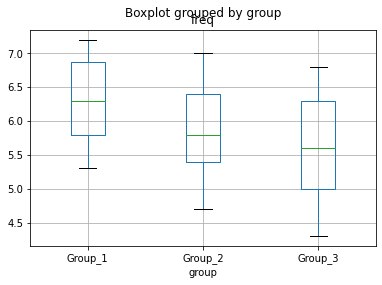

In [13]:
df.boxplot(column ="freq", by ="group")

In [14]:
# G2 - G3 는 차이가 없다 (reject False)